In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp

# Fonte dos dados: http://sistemas.saude.rj.gov.br/tabnetbd/dhx.exe?covid19/esus_sivep.def

In [2]:
# Labels do eixo horizontal.
lista = []
for ano in range(2020,2023,1):
    for mes in range(1,13,1):
        if mes < 10:
            lista.append(f'{ano}/0{mes}/01')
        else:
            lista.append(f'{ano}/{mes}/01')
labels_lista = lista[3:27]

In [11]:
população = 515317 # Em 2020

# Sobre a cidade Tanguá

In [3]:
dados0 = pd.read_csv('/home/isplay/Caixa de Areia/Dados/csv/Infectados_em_Tanguá.csv', index_col=0)

Text(0.5, 1.0, 'Infectados na cidade Tanguá.')

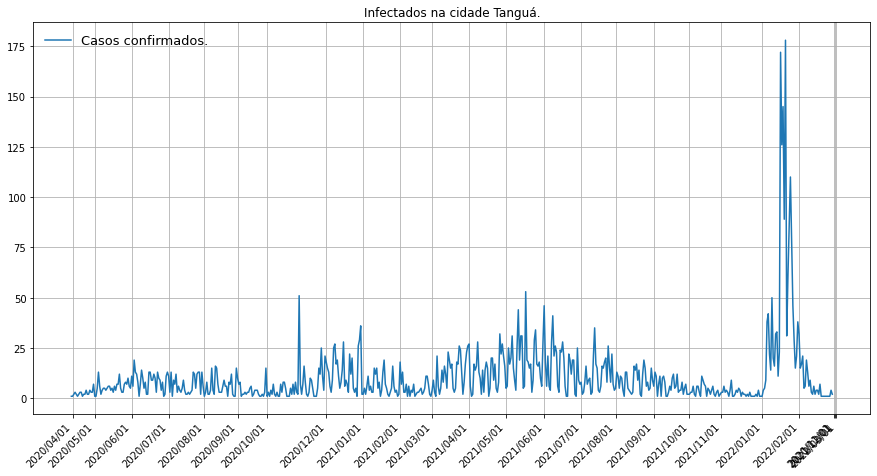

In [4]:
dados0_y_tangua = dados0['Tanguá'].to_numpy()
dados0_x_tangua = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_tangua, dados0_y_tangua, label='Casos confirmados.')
ax.grid(True)
ax.legend(frameon=False, fontsize=13)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Tanguá.')
#ax.set_ylim([0,40000])

# Sobre a cidade Rio de Janeiro

In [5]:
dados0 = pd.read_csv('/home/isplay/Caixa de Areia/Dados/csv/Infectados_em_Rio_de_Janeiro(cidade).csv', index_col=0)

Text(0.5, 1.0, 'Infectados na cidade Rio de Janeiro.')

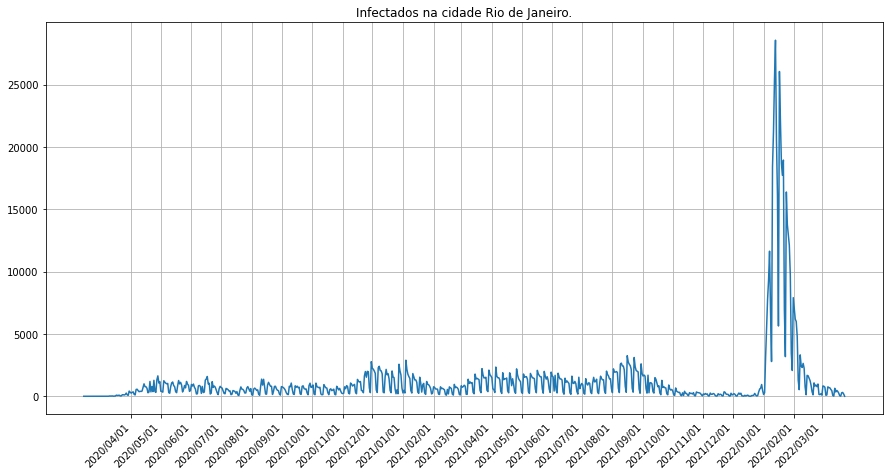

In [6]:
dados0_y_rj = dados0['Rio de Janeiro'].to_numpy()
dados0_x_rj = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_rj, dados0_y_rj)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Rio de Janeiro.')
#ax.set_ylim([0,40000])

# Sobre a cidade Niterói

In [8]:
niteroi = pd.read_csv('/home/isplay/Caixa de Areia/Dados/csv/Infectados_em_Niterói.csv', index_col=0)

Text(0.5, 1.0, 'Infectados na cidade Niterói')

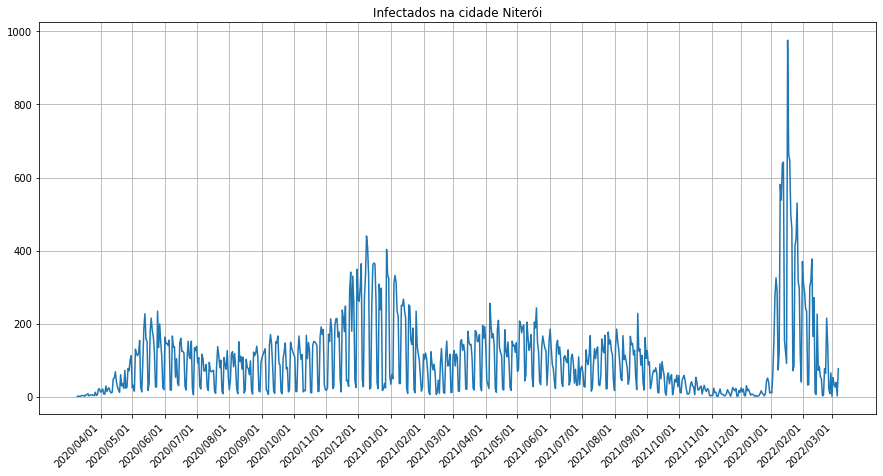

In [9]:
dados0_y_niteroi = niteroi['Casos'].to_numpy()
dados0_x_niteroi = niteroi.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_niteroi, dados0_y_niteroi)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Niterói')

# Gráfico com os dados das cidades do Rio de Janeiro, Niterói e Tanguá.

(0.0, 5000.0)

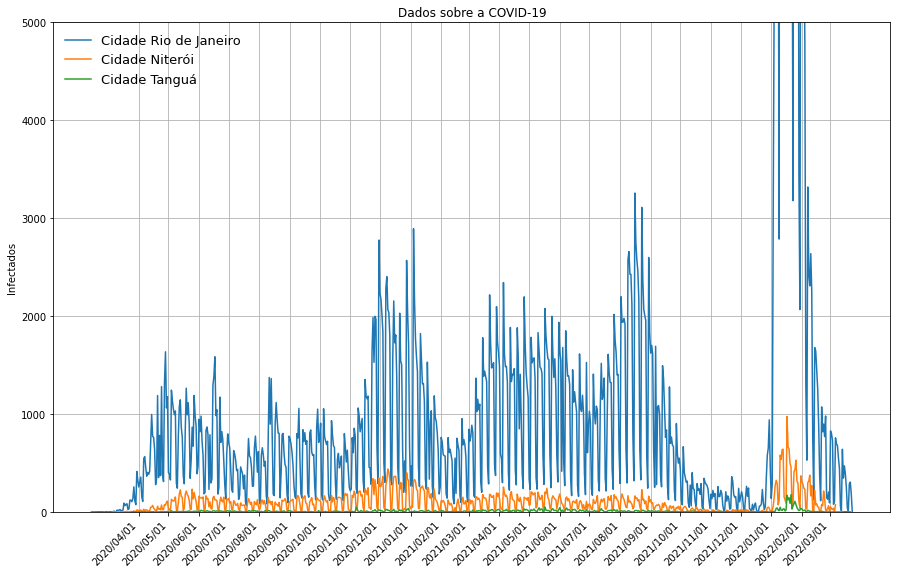

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(dados0_x_rj, dados0_y_rj, label='Cidade Rio de Janeiro')
ax.plot(dados0_x_niteroi, dados0_y_niteroi, label='Cidade Niterói')
ax.plot(dados0_x_tangua, dados0_y_tangua, label='Cidade Tanguá')
ax.grid(True)
ax.legend(frameon=False, fontsize=13)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
ax.set_title('Dados sobre a COVID-19')
ax.set_ylabel('Infectados')

ax.set_ylim([0,5000])
#ax.set_xlim(['2021/11/01','2022/03/01'])


# 

# População

# Pico da Ômicron

In [7]:
# Pico da Ômicron.

lista = []
for ano in range(2020,2023,1):
    for mes in range(1,13,1):
        if mes < 10:
            lista.append(f'{ano}/0{mes}/01')
        else:
            lista.append(f'{ano}/{mes}/01')
            
c3 = niteroi['2021/12/15':'2022/03/01']

dias_curva_3 = c3.index
dias_curva_3.to_numpy()

labels_lista_3 = []
for i in dias_curva_3:
    if i in lista:
        labels_lista_3.append(i)    
        
c3['Casos'] = c3['Casos']/população
casos_curva_3 = c3['Casos'].to_numpy()


"""fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dias_curva_3, casos_curva_3, label='Casos confirmados')
ax.set_xticks(labels_lista_3)
ax.grid(True)
ax.set_xlabel('Tempo (Meses)')
ax.set_ylabel('População (%)')
ax.legend(frameon=False, fontsize=13)
ax.set_title(f'COVID19 em Niterói entre os dias {dias_curva_3[0]} e {dias_curva_3[-1]}.')   
"""
print('')

/tmp/ipykernel_17935/226612816.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c3['Casos'] = c3['Casos']/população


Text(0.68, 0.8, 'Alpha = 1\nBeta = 2\nGamma = 1\ni0 = 0.0001\nPopulação = 515317')

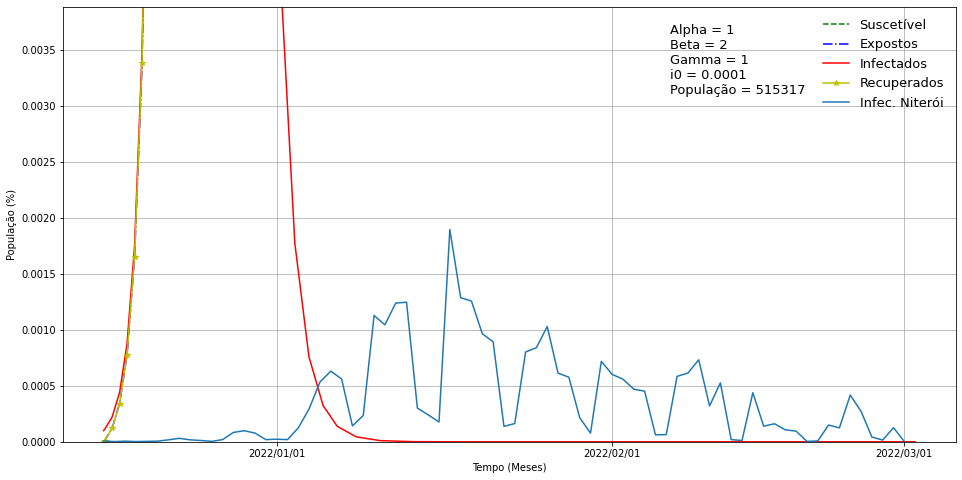

In [8]:
# Modelo SEIR do Pico da Ômicron. -Não wiki.


def seir(t, y, alpha, beta, gamma, delta):
    s, e, i, r = y
    dsdt = - beta * s * i - alpha * s * i
    dedt = alpha * s * i - delta * e * i
    didt = beta * s * i + delta * e * i - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt


beta =  2
gamma = 1
alpha = 1
i0 =    1e-4
delta = beta + 1

e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0
t0, t = 0, dias_curva_3.size

res = solve_ivp(seir, (t0, t), args=(alpha, beta, gamma, delta), y0=[s0, e0, i0, r0],method='Radau')

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(res.t, res.y[0], '--g', label='Suscetível')
ax.plot(res.t, res.y[1], '-.b', label='Expostos')
ax.plot(res.t, res.y[2], '-r', label='Infectados')
ax.plot(res.t, res.y[3], '-*y', label='Recuperados')
ax.plot(dias_curva_3,casos_curva_3,label='Infec. Niterói')
ax.grid(True)
ax.legend(frameon=False, loc='upper right', fontsize=13)
ax.set_xticks(labels_lista_3)
ax.set_xlabel('Tempo (Meses)')
ax.set_ylabel('População (%)')
ax.set_ylim([0,2000/população])
ax.text( 0.68, 0.8, f'Alpha = {alpha}\nBeta = {beta}\nGamma = {gamma}\ni0 = {i0}\nPopulação = {população}', transform=ax.transAxes, fontsize=13)
#ax.set_xlim(['2022/01/01','2022/02/01'])

(0.0, 0.0038811061928870965)

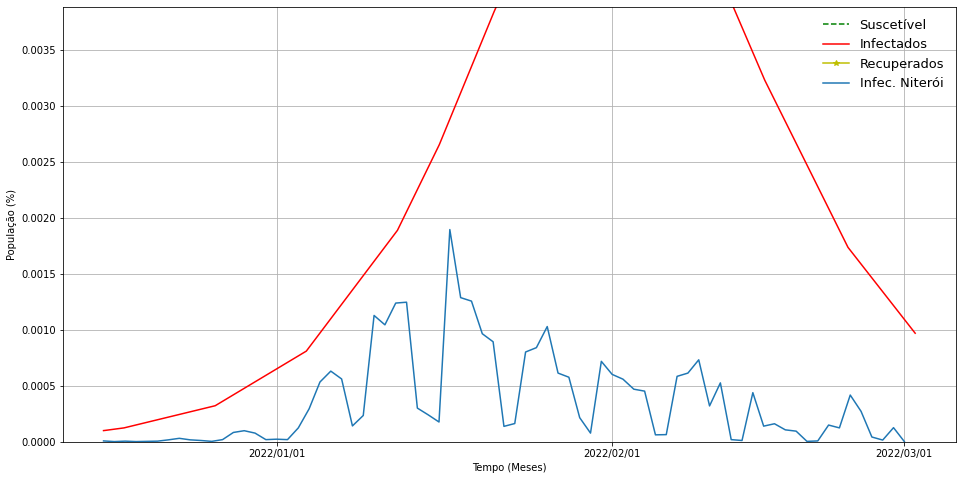

In [38]:
# SIR

def sir(t, y, beta, gamma):
    s, i, r = y
    dsdt = - beta * s * i
    didt = beta * s * i - gamma * i
    drdt = gamma * i
    return dsdt, didt, drdt


beta =  1.12
gamma = 1
i0 =    1e-4

r0 = 0.005
s0 = 1 - i0 - r0
t0, t = 0, dias_curva_3.size

res = solve_ivp(sir, (t0, t), args=(beta, gamma), y0=[s0, i0, r0], method='Radau')

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(res.t, res.y[0], '--g', label='Suscetível')
ax.plot(res.t, res.y[1], '-r', label='Infectados')
ax.plot(res.t, res.y[2], '-*y', label='Recuperados')
ax.plot(dias_curva_3,casos_curva_3,label='Infec. Niterói')
ax.grid(True)
ax.legend(frameon=False, loc='upper right', fontsize=13)
ax.set_xticks(labels_lista_3)
ax.set_xlabel('Tempo (Meses)')
ax.set_ylabel('População (%)')
ax.set_ylim([0,2000/população])
#ax.set_xlim(['2022/01/01','2022/02/01'])






# 

# Sobre o Estado do Rio de Janeiro

In [17]:
dados0 = pd.read_csv('/home/isplay/Caixa de Areia/Dados/csv/Infectados_em_Rio_de_Janeiro(Estado)_diários.csv',index_col=0)

(0.0, 40000.0)

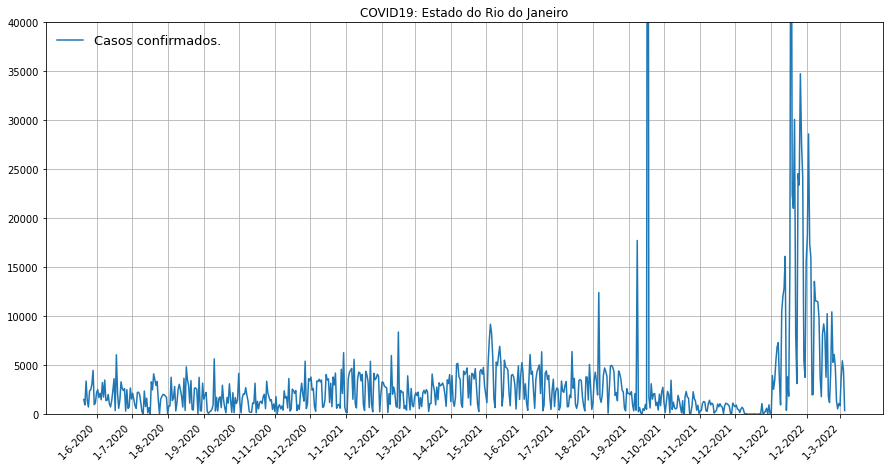

In [18]:
lista = []
for ano in range(2020,2023,1):
    for mes in range(1,13,1):
        lista.append(f'1-{mes}-{ano}')
labels_lista = lista[5:27]

dados0_y_rj = dados0['Confirmados diários'].to_numpy()
dados0_x_rj = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_rj, dados0_y_rj, label='Casos confirmados.')
ax.grid(True)
ax.legend(frameon=False, fontsize=13)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('COVID19: Estado do Rio do Janeiro')
ax.set_ylim([0,40000])

# Primeiro pico

/tmp/ipykernel_2957/1442152050.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['Casos'] = c1['Casos']/população


Text(0.5, 1.0, 'COVID19 em Niterói entre os dias 2020/03/05 e 2020/08/07.')

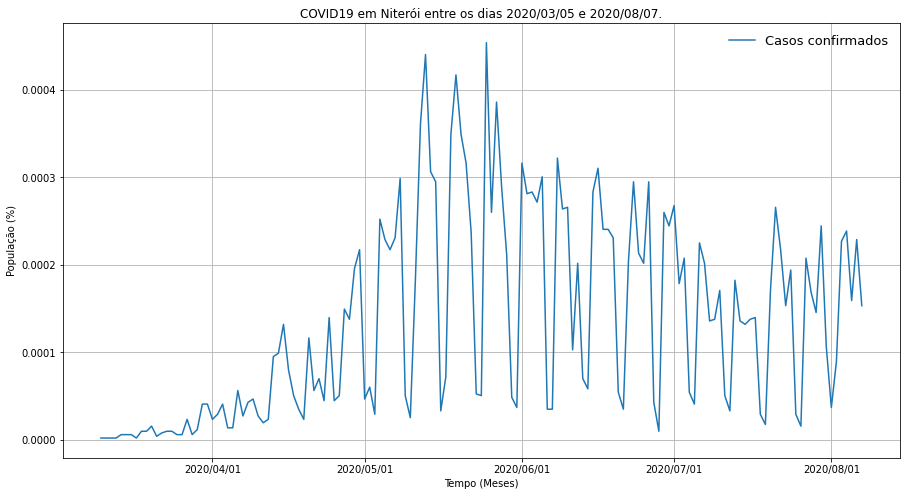

In [8]:
# Primeiro pico.

lista = []
for ano in range(2020,2023,1):
    for mes in range(1,13,1):
        if mes < 10:
            lista.append(f'{ano}/0{mes}/01')
        else:
            lista.append(f'{ano}/{mes}/01')
            
c1 = niteroi['2020/03/05':'2020/08/07']

dias_curva_1 = c1.index
dias_curva_1.to_numpy()

labels_lista_1 = []
for i in dias_curva_1:
    if i in lista:
        labels_lista_1.append(i)
        
c1['Casos'] = c1['Casos']/população
casos_curva_1 = c1['Casos'].to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dias_curva_1, casos_curva_1, label='Casos confirmados')
ax.set_xticks(labels_lista_1)
ax.grid(True)
ax.legend(frameon=False, fontsize=13)
ax.set_xlabel('Tempo (Meses)')
ax.set_ylabel('População (%)')
ax.set_title(f'COVID19 em Niterói entre os dias {dias_curva_1[0]} e {dias_curva_1[-1]}.')        

Text(0.68, 0.8, 'Alpha = 2.5\nBeta = 3.1\nGamma = 3\ne0 = 0\nPopulação = 515317')

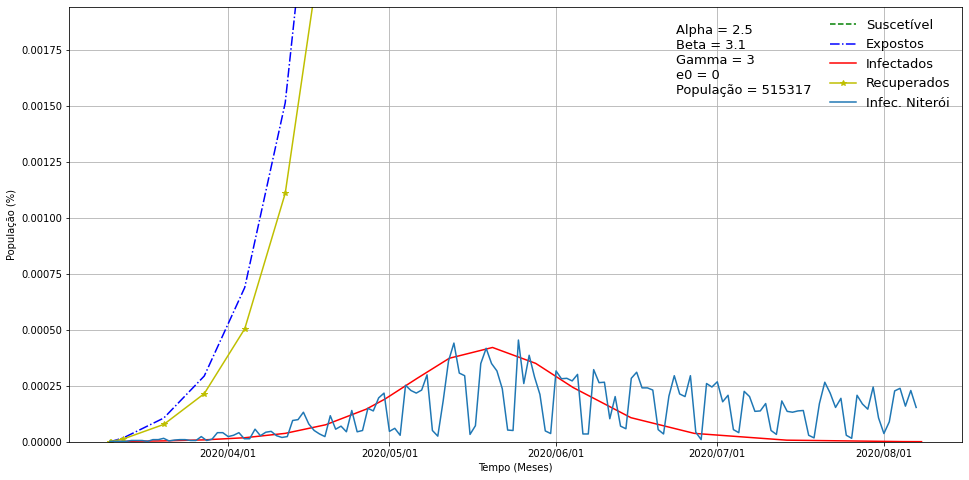

In [82]:
# Modelo SEIR do Primeiro pico. -Não wiki.


def seir(t, y, alpha, beta, gamma, delta):
    s, e, i, r = y
    dsdt = - beta * s * i - delta * s * i
    dedt = delta * s * i - alpha * e * i
    didt = beta * s * i + alpha * e * i - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

beta =  3.1
gamma = 3
alpha = 2.5
i0 =    1.5e-6
delta = beta + 1


t0, t = 0, dias_curva_1.size
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

res = solve_ivp(seir, (t0, t), args=(alpha, beta, gamma, delta), y0=[s0, e0, i0, r0],method='Radau')

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(res.t, res.y[0], '--g', label='Suscetível')
ax.plot(res.t, res.y[1], '-.b', label='Expostos')
ax.plot(res.t, res.y[2], '-r', label='Infectados')
ax.plot(res.t, res.y[3], '-*y', label='Recuperados')
ax.plot(dias_curva_1,casos_curva_1,label='Infec. Niterói')
ax.grid(True)
ax.legend(frameon=False, loc='best', fontsize=13)
ax.set_xticks(labels_lista_1)
ax.set_xlabel('Tempo (Meses)')
ax.set_ylabel('População (%)')
ax.set_ylim([0,1000/população])
ax.text( 0.68, 0.8, f'Alpha = {alpha}\nBeta = {beta}\nGamma = {gamma}\ne0 = {e0}\nPopulação = {população}', transform=ax.transAxes, fontsize=13)

# Segundo pico

/tmp/ipykernel_2957/1762069057.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2['Casos'] = c2['Casos']/população


Text(0.5, 1.0, 'COVID19 em Niterói entre os dias 2020/10/01 e 2021/03/01.')

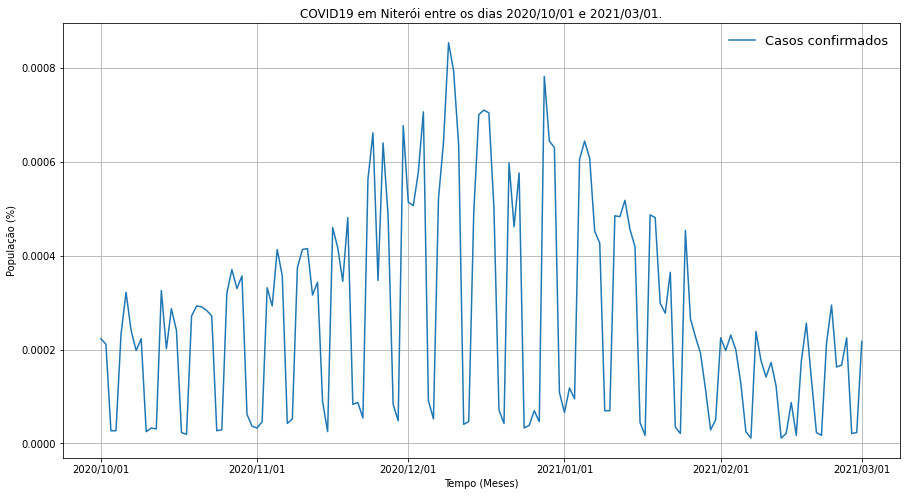

In [13]:
# Segundo pico.

lista = []
for ano in range(2020,2023,1):
    for mes in range(1,13,1):
        if mes < 10:
            lista.append(f'{ano}/0{mes}/01')
        else:
            lista.append(f'{ano}/{mes}/01')
            
c2 = niteroi['2020/10/01':'2021/03/01']

dias_curva_2 = c2.index
dias_curva_2.to_numpy()

labels_lista_2 = []
for i in dias_curva_2:
    if i in lista:
        labels_lista_2.append(i)    
        
c2['Casos'] = c2['Casos']/população
casos_curva_2 = c2['Casos'].to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dias_curva_2, casos_curva_2, label='Casos confirmados')
ax.set_xticks(labels_lista_2)
ax.grid(True)
ax.set_xlabel('Tempo (Meses)')
ax.set_ylabel('População (%)')
ax.legend(frameon=False, fontsize=13)
ax.set_title(f'COVID19 em Niterói entre os dias {dias_curva_2[0]} e {dias_curva_2[-1]}.')   


Text(0.68, 0.8, 'Alpha = 10\nBeta = 6.0\nGamma = 5.88\ne0 = 0\nPopulação = 515317')

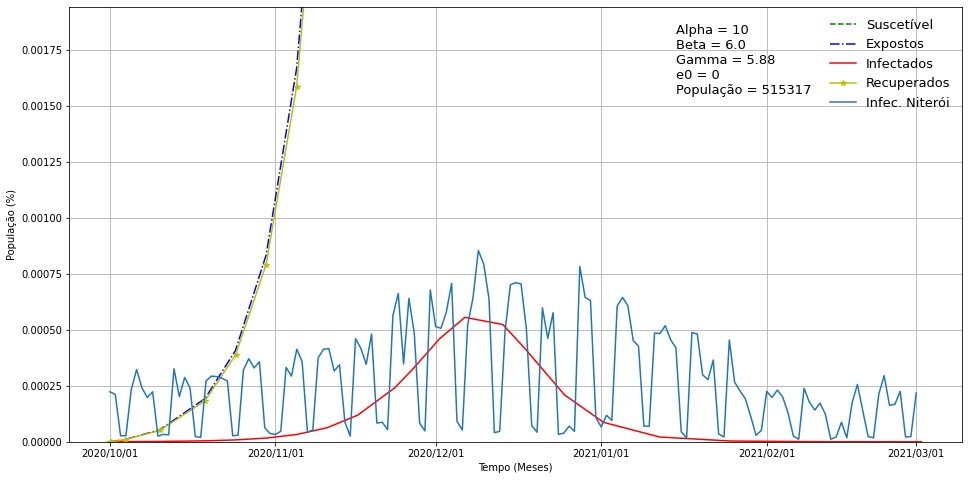

In [98]:
# Modelo SEIR do Segundo pico. -Não wiki.

def seir(t, y, alpha, beta, gamma, delta):
    s, e, i, r = y
    dsdt = - beta * s * i - delta * s * i
    dedt = delta * s * i - alpha * e * i
    didt = beta * s * i + alpha * e * i - gamma * i
    drdt = gamma * i
    return dsdt, dedt, didt, drdt

beta =  6.0
gamma = 5.88
alpha = 10
i0 =    5e-7
delta = beta + 0.2

t0, t = 0, dias_curva_2.size
e0 = 0
r0 = 0
s0 = 1 - e0 - i0 - r0

res = solve_ivp(seir, (t0, t), args=(alpha, beta, gamma, delta), y0=[s0, e0, i0, r0],method='Radau')

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(res.t, res.y[0], '--g', label='Suscetível')
ax.plot(res.t, res.y[1], '-.b', label='Expostos')
ax.plot(res.t, res.y[2], '-r', label='Infectados')
ax.plot(res.t, res.y[3], '-*y', label='Recuperados')
ax.plot(dias_curva_2,casos_curva_2,label='Infec. Niterói')
ax.legend(frameon=False, loc='upper right', fontsize=13)
ax.set_xticks(labels_lista_2)
ax.set_xlabel('Tempo (Meses)')
ax.set_ylabel('População (%)')
ax.grid(True)
ax.set_ylim([0,1000/população])
ax.text( 0.68, 0.8, f'Alpha = {alpha}\nBeta = {beta}\nGamma = {gamma}\ne0 = {e0}\nPopulação = {população}', transform=ax.transAxes, fontsize=13)